In [2]:
!pip install matplotlib seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 17.8 MB/s eta 0:00:00a 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [seaborn]m6/7 [seaborn]ib]


In [3]:
import os
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns




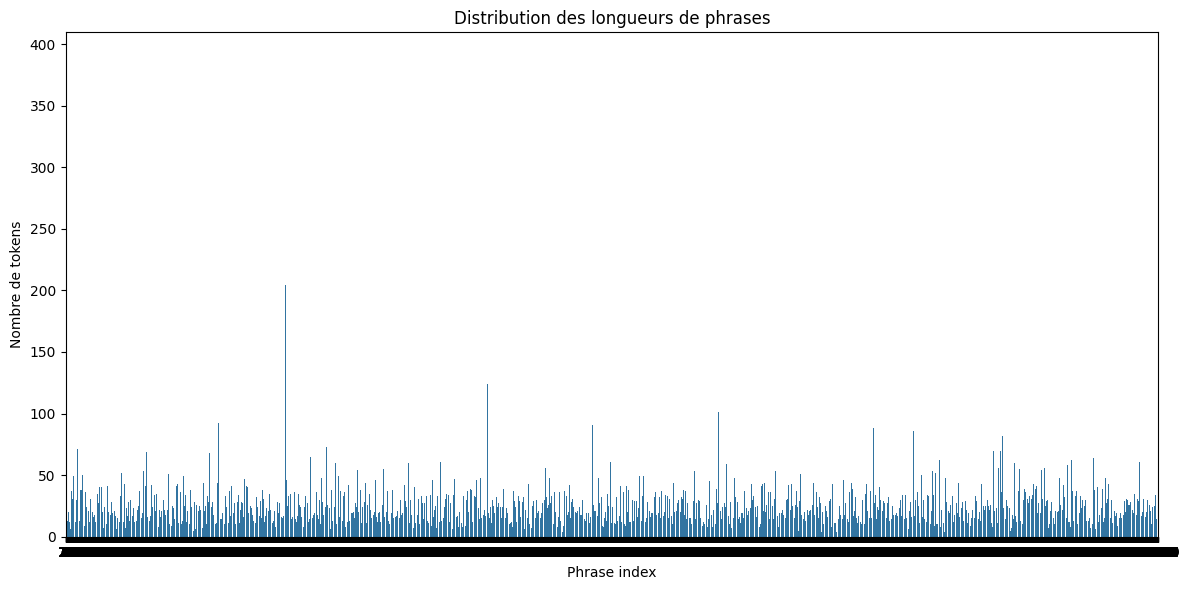

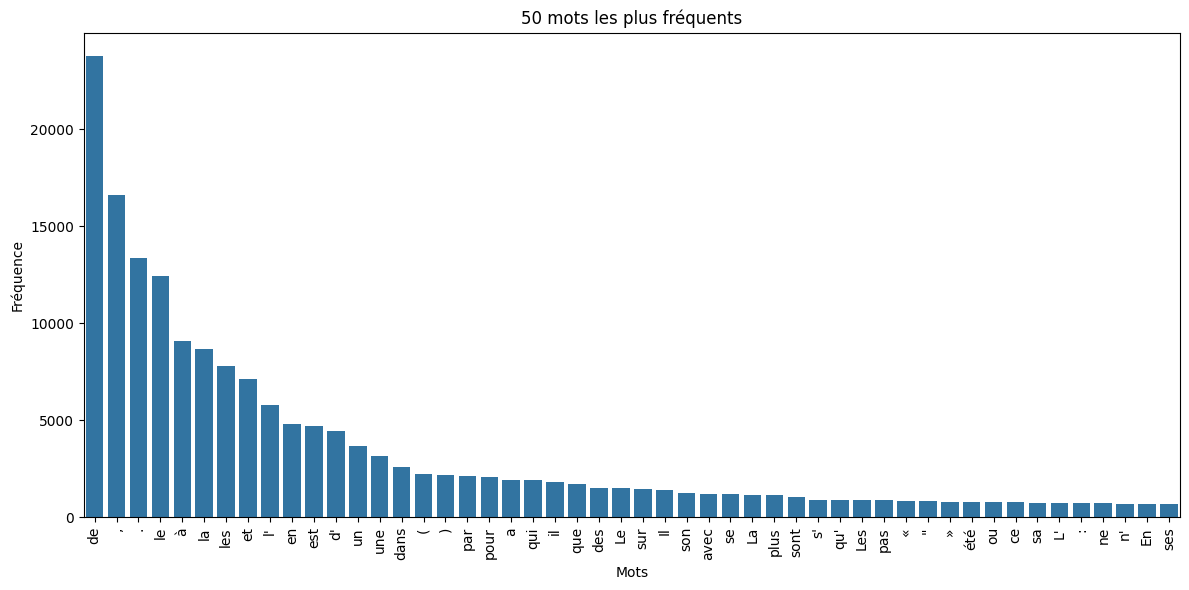

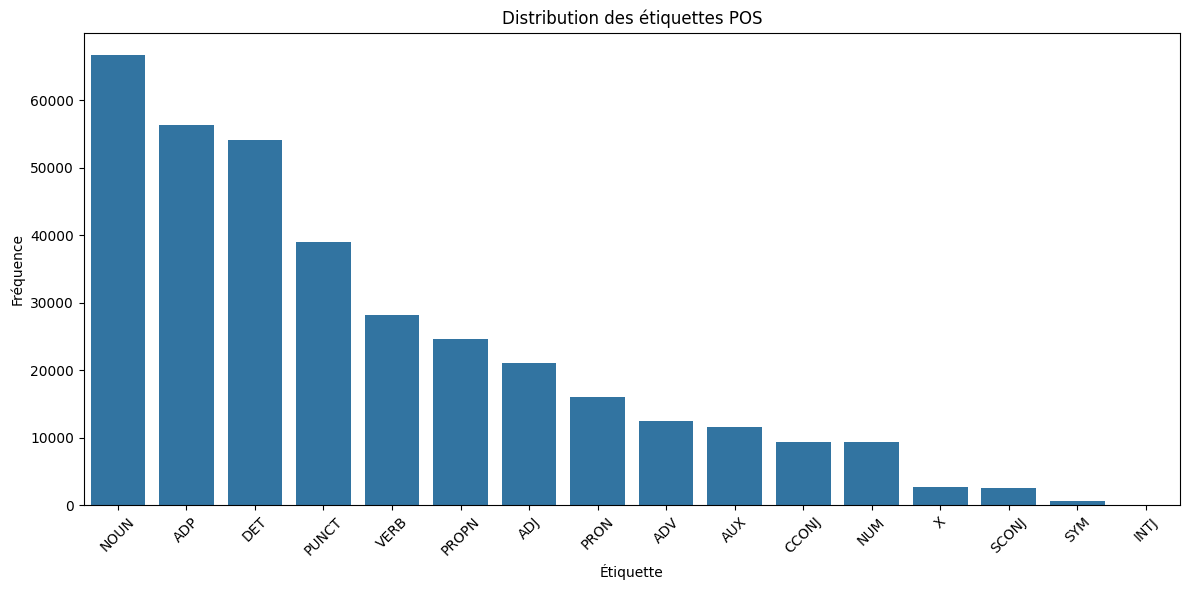

In [11]:


###################### Parser le fichier CONLLU ######################

def parse_conllu(filepath):
    sentences = []
    current = []
    with open(filepath, "r", encoding="utf-8") as file:
        for line in file:
            line = line.strip()
            if not line or line.startswith("#"):
                if current:
                    sentences.append(current)
                    current = []
                continue
            parts = line.split("\t")
            if len(parts) >= 4 and '.' not in parts[0] and '-' not in parts[0]:
                word = parts[1]
                upos = parts[3]
                current.append((word, upos))
    if current:
        sentences.append(current)
    return sentences
    

################## Stats #################

def compute_lengths(corpus):
    return [len(sentence) for sentence in corpus]

def compute_word_frequencies(corpus):
    words = [word for sentence in corpus for word, _ in sentence]
    return Counter(words)

def compute_pos_frequencies(corpus):
    tags = [tag for sentence in corpus for _, tag in sentence]
    return Counter(tags)


##################### Digramme ##################

def plot_histogram(data, title, xlabel, ylabel, rotation=0, top_n=None):
    if isinstance(data, Counter):
        data = data.most_common(top_n)
        labels, values = zip(*data)
    else:
        labels, values = list(range(len(data))), data

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(labels), y=list(values))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()


################# Pipeline ####################

def analyse_ud_conllu(filepath):
    corpus = parse_conllu(filepath)

    # Longueur des phrases
    lengths = compute_lengths(corpus)
    plot_histogram(lengths, "Distribution des longueurs de phrases", "Phrase index", "Nombre de tokens")

    # Fréquence des mots
    word_freqs = compute_word_frequencies(corpus)
    plot_histogram(word_freqs, "50 mots les plus fréquents", "Mots", "Fréquence", rotation=90, top_n=50)

    # Fréquence des POS
    pos_freqs = compute_pos_frequencies(corpus)
    plot_histogram(pos_freqs, "Distribution des étiquettes POS", "Étiquette", "Fréquence", rotation=45)

    return corpus, word_freqs, pos_freqs


##################################################################@

if __name__ == "__main__":
    chemin_conllu = "data/UD_French-GSD/UD_French-GSD-master/fr_gsd-ud-train.conllu"
    analyse_ud_conllu(chemin_conllu)



In [10]:

print("Fichier trouvé :", os.path.exists(chemin_conllu))
print("Chemin absolu :", os.path.abspath(chemin_conllu))

Fichier trouvé : True
Chemin absolu : /Users/sasha/Documents/Outils de corpus/data/UD_French-GSD/UD_French-GSD-master/fr_gsd-ud-train.conllu
